In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df_train.shape

(42000, 785)

In [5]:
df_train.size

32970000

In [6]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
pc_object = PCA(n_components=100)

In [9]:
train_trf = pc_object.fit_transform(df_train.iloc[:,1:])

In [10]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# plt.imshow(df_train.iloc[25238, 1:].values.reshape(28,28))

In [12]:
# plt.imshow(df_train.iloc[33039, 1:].values.reshape(28,28))

In [13]:
train_trf_df = pd.DataFrame(train_trf)

In [14]:
X = train_trf_df.iloc[:,:]
y = df_train.iloc[:,0]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
# X_train.head()
# y_train.head()
# X_test.head()
# y_test.head()

In [18]:
type(X_test)

pandas.core.frame.DataFrame

In [19]:
X_train.shape

(33600, 100)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_clsfr = KNeighborsClassifier()

In [22]:
knn_clsfr.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
type(X_test)

pandas.core.frame.DataFrame

In [24]:
import time
start = time.time()
print(time.time())
y_pred = knn_clsfr.predict(X_test)
print(time.time()- start)

1691838140.8580399
1.7823173999786377


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9702380952380952

In [26]:
y_pred

array([2, 8, 4, ..., 2, 2, 2])

In [27]:
count = 0
for i in range(0,len(y_test)):
    if y_test.iloc[i] == y_pred[i]:
        pass
#         print("TP", y_test.iloc[i])
    elif y_test.iloc[i] != y_pred[i]:
#         print(f"FP/FN, actual-{y_test.iloc[i]}, pred-{y_pred[i]}")
        count = count + 1

print('FP/FN count',count)

FP/FN count 250


In [28]:
from sklearn.metrics import confusion_matrix

conf_matr = confusion_matrix(y_test,y_pred, labels=[1, 7, 3, 9, 2, 6, 0, 4, 8, 5])

In [29]:
conf_matr

array([[963,   2,   1,   1,   3,   1,   0,   0,   0,   0],
       [  7, 877,   1,   9,   1,   0,   0,   2,   0,   0],
       [  2,   6, 810,   3,   6,   2,   2,   0,   7,   8],
       [  0,   7,   7, 778,   2,   2,   5,   7,   2,   4],
       [  2,  12,   0,   2, 780,   2,   6,   0,   2,   0],
       [  3,   0,   0,   0,   0, 824,   3,   1,   1,   3],
       [  0,   0,   0,   0,   1,   2, 852,   0,   0,   0],
       [  6,   1,   0,  18,   0,   3,   0, 811,   0,   0],
       [ 10,   0,  15,  10,   3,   5,   2,   2, 728,  11],
       [  0,   1,   9,   4,   0,   7,   1,   0,   2, 727]])

In [30]:
# plt.imshow(df_train.iloc[9546,1:].values.reshape(28,28))

In [31]:
user_input = X_test.iloc[0, :]
type(user_input)

pandas.core.series.Series

In [32]:
#Converting the user input in into 2-D data. 1(No. of data)x100(features)
user_input_values = user_input.values.reshape(1,100)

In [33]:
knn_clsfr.predict(user_input_values)

array([2])

## ****Now let's find out the best model with best reduction of dimesnionality

In [34]:
df_train.shape

(42000, 785)

In [35]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:,0]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [37]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Checking for the missing values in the dataset

In [38]:
count = 0
for i in df_train.isnull().sum():
    if i != 0:
        count = count + 1
        print("Not Filled/missing value")
        
if count == 0:
    print('No Null values in the dataset')

No Null values in the dataset


### Checking for the outliers in the dataset

In [39]:
import seaborn as sns

In [40]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [41]:
len(df_train.columns)

785

In [42]:
# for i in range(0,len(df_train.columns)-1):
#     column_name = 'pixel'+str(i)
#     fig = plt.figure()
#     sns.distplot(df_train[column_name])
#     fig.savefig(f'pixel{i}.png')
#     if i == 5:
#         break

In [43]:
# import os
# import shutil

In [44]:
# os.remove('/kaggle/working/')
# shutil.rmtree('/kaggle/working/')

## Training Data
X_train

y_train

## Testing Data
X_test

y_test

In [45]:
X_train.shape[1]

784

In [269]:
for i in range(1,X_train.shape[1]):
    pca_object = PCA(n_components=i)
    X_train_trf = pca_object.fit_transform(X_train)
    y_train_trf = y_train
    X_test_trf = pca_object.fit_transform(X_test)
    y_test_trf = y_test
    
    knn_instance = KNeighborsClassifier()
    knn_instance.fit(X_train_trf,y_train)
    y_pred = knn_instance.predict(X_test_trf)
    
    if accuracy_score(y_test,y_pred) >= 0.85:
        print(f'PCA with {i} principle component, the accuracy is: ',accuracy_score(y_test,y_pred))

PCA with 7 principle component, the accuracy is:  0.8551190476190477
PCA with 8 principle component, the accuracy is:  0.8808333333333334
PCA with 9 principle component, the accuracy is:  0.898452380952381


KeyboardInterrupt: 

In [46]:
pca = PCA(n_components=3)
X_train_vis = pca.fit_transform(X_train)
X_test_vis = pca.fit_transform(X_test)

In [47]:
# pd.DataFrame(X_train_vis)
len(X_train_vis[:,0])

33600

In [48]:
import plotly.express as px
px.scatter_3d(X_train, x=X_train_vis[:,0], y=X_train_vis[:,1], z=X_train_vis[:,2], color=y_train.astype('str'))

In [65]:
### Eigen Values
pca.explained_variance_.shape

(3,)

In [59]:
pca.explained_variance_ratio_ * 100

array([9.82219873, 7.07499767, 6.180109  ])

In [55]:
### Eigen Vectors
pca.components_

array([[-6.35451976e-18,  1.97950394e-19,  1.68225747e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.23877543e-17, -1.02077361e-19,  1.62871456e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.20187224e-18, -7.37936798e-18, -7.25807325e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [57]:
X_train_vis.shape

(33600, 3)

In [58]:
X_test_vis.shape

(8400, 3)

In [60]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Finding the best number of Principle components with the help of the Eigen Vector

In [62]:
pca_best = PCA(n_components=None)
X_train_1 = pca_best.fit_transform(X_train)
X_test_1 = pca_best.fit_transform(X_test)

In [64]:
pca_best.explained_variance_.shape

(784,)

In [70]:
pca_best.explained_variance_ratio_*100

array([9.82219873e+00, 7.07499768e+00, 6.18010928e+00, 5.36430504e+00,
       4.89717741e+00, 4.34030299e+00, 3.27823310e+00, 2.95403780e+00,
       2.72627640e+00, 2.30998751e+00, 2.11324152e+00, 2.05398864e+00,
       1.70083342e+00, 1.69306331e+00, 1.62077241e+00, 1.45304001e+00,
       1.35049001e+00, 1.27071012e+00, 1.20283160e+00, 1.13576369e+00,
       1.08394271e+00, 1.00252972e+00, 9.52946422e-01, 9.08613316e-01,
       8.81610211e-01, 8.28558481e-01, 8.17291435e-01, 7.66129803e-01,
       7.50406363e-01, 6.80662859e-01, 6.62751381e-01, 6.47321672e-01,
       6.10595705e-01, 5.88316150e-01, 5.76589856e-01, 5.49477984e-01,
       5.00615839e-01, 4.90006427e-01, 4.76023726e-01, 4.64993303e-01,
       4.53790219e-01, 4.38274860e-01, 4.16948015e-01, 3.96862641e-01,
       3.84535567e-01, 3.78986578e-01, 3.61159311e-01, 3.48876582e-01,
       3.37418220e-01, 3.33380601e-01, 3.15286039e-01, 3.11158199e-01,
       2.98166523e-01, 2.94408502e-01, 2.84029686e-01, 2.70643002e-01,
      

### let's find out where we get 90% of weightage after adding the principle componenets

In [71]:
# np.cumsum(pca_best.explained_variance_ratio_*100)

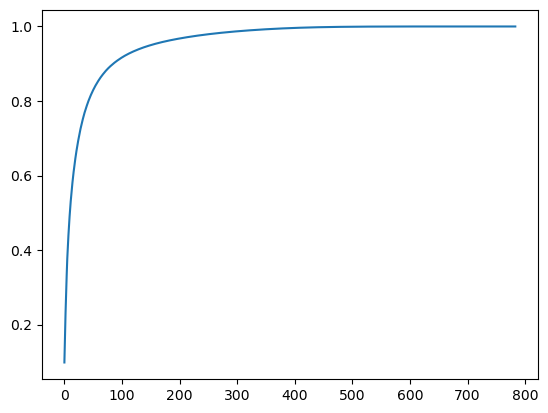

In [72]:
plt.plot(np.cumsum(pca_best.explained_variance_ratio_))